# This notebook has the commands for creating a horizontal bar chart for medication use proportion data within communities

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [208]:
#data_arms1 = pd.read_csv('/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/code/jacob/ARMS1_comb_fluid_comm.csv')
#data_arms2 = pd.read_csv('/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/code/jacob/ARMS2_comb_fluid_comm.csv')
data_arms1 = pd.read_csv('/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/code/jacob/ARMS1_comb_list_comm.csv')
data_arms2 = pd.read_csv('/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/code/jacob/ARMS2_comb_list_comm.csv')

#arms2data_arms1comm = pd.read_csv('/home/faird/lundq163/projects/FRF_results_viz/GBM_work/id_predictions_list_ARMS2data_ARMS1pred.csv')
#arms1data_arms2comm = pd.read_csv('/home/faird/lundq163/projects/FRF_results_viz/GBM_work/id_predictions_list_ARMS1data_ARMS2pred.csv')
#arms2data_arms1comm = pd.read_csv('/home/faird/lundq163/projects/FRF_results_viz/GBM_work/id_predictions_fluid_ARMS2data_ARMS1pred.csv')
#arms1data_arms2comm = pd.read_csv('/home/faird/lundq163/projects/FRF_results_viz/GBM_work/id_predictions_fluid_ARMS1data_ARMS2pred.csv')

#sui_df = pd.read_csv('./substance_use_rdata.csv', low_memory=False)
mtp_df = pd.read_csv('./stim_mtp_use.csv', low_memory=False)
dmtp_df = pd.read_csv('./stim_dmtp_use.csv', low_memory=False)
amp_df = pd.read_csv('./stim_amp_use.csv', low_memory=False)
damp_df = pd.read_csv('./stim_damp_use.csv', low_memory=False)
ldam_df = pd.read_csv('./stim_ldam_use.csv', low_memory=False)

axt_df = pd.read_csv('./nonstim_axt_use.csv', low_memory=False)
vxz_df = pd.read_csv('./nonstim_vxz_use.csv', low_memory=False)
gfc_df = pd.read_csv('./nonstim_gfc_use.csv', low_memory=False)
nid_df = pd.read_csv('./nonstim_nid_use.csv', low_memory=False)


data_arms1
#arms1data_arms2comm

,subject_id,community
0,NDAR_INV003RTV85,7
1,NDAR_INV007W6H7B,7
2,NDAR_INV00BD7VDC,5
3,NDAR_INV00HEV6HB,1
4,NDAR_INV00LH735Y,8
...,...,...
3332,NDAR_INVZY8L7CT1,4
3333,NDAR_INVZYC44GB8,2
3334,NDAR_INVZZ05KY5J,1
3335,NDAR_INVZZFG6J5U,4


In [209]:
nid_df.dtypes

subject_id     object
eventname      object
nid              bool
nid_24         object
nid_ago       float64
dtype: object

In [211]:
nid_df['eventname'].value_counts()

eventname
baseline_year_1_arm_1       11859
1_year_follow_up_y_arm_1    11196
2_year_follow_up_y_arm_1    10905
3_year_follow_up_y_arm_1    10285
4_year_follow_up_y_arm_1     4746
Name: count, dtype: int64

In [212]:
#currently keeping all communities, regardless of size, because we are trying to evaluate across the arms with the overfit xgb model

communities_more_than_100_arms1 = data_arms1['community'].value_counts()[data_arms1['community'].value_counts() > 100].index
communities_more_than_100_arms2 = data_arms2['community'].value_counts()[data_arms2['community'].value_counts() > 100].index
filtered_data_arms1 = data_arms1[data_arms1['community'].isin(communities_more_than_100_arms1)]
filtered_data_arms2 = data_arms2[data_arms2['community'].isin(communities_more_than_100_arms2)]

#filtered_data_arms1 = arms2data_arms1comm
#filtered_data_arms2 = arms1data_arms2comm

In [213]:
#convert community to a categorical variable to ensure proper ordering on the x-axis
filtered_data_arms1.loc[:, 'community'] = pd.Categorical(filtered_data_arms1['community'])
filtered_data_arms2.loc[:, 'community'] = pd.Categorical(filtered_data_arms2['community'])

In [214]:
filtered_data_arms1

,subject_id,community
0,NDAR_INV003RTV85,7
1,NDAR_INV007W6H7B,7
2,NDAR_INV00BD7VDC,5
3,NDAR_INV00HEV6HB,1
4,NDAR_INV00LH735Y,8
...,...,...
3332,NDAR_INVZY8L7CT1,4
3333,NDAR_INVZYC44GB8,2
3334,NDAR_INVZZ05KY5J,1
3335,NDAR_INVZZFG6J5U,4


In [215]:
nid_df

,subject_id,eventname,nid,nid_24,nid_ago
0,NDAR_INV003RTV85,baseline_year_1_arm_1,False,False,NaN
1,NDAR_INV003RTV85,1_year_follow_up_y_arm_1,False,False,NaN
2,NDAR_INV003RTV85,2_year_follow_up_y_arm_1,False,False,NaN
3,NDAR_INV003RTV85,3_year_follow_up_y_arm_1,False,False,NaN
4,NDAR_INV005V6D2C,baseline_year_1_arm_1,False,False,NaN
...,...,...,...,...,...
48986,NDAR_INVZZZP87KR,baseline_year_1_arm_1,False,False,NaN
48987,NDAR_INVZZZP87KR,1_year_follow_up_y_arm_1,False,False,NaN
48988,NDAR_INVZZZP87KR,2_year_follow_up_y_arm_1,False,False,NaN
48989,NDAR_INVZZZP87KR,3_year_follow_up_y_arm_1,False,False,NaN


# merge sui with filtered frf (or xgb) communities

In [216]:
stim_merged_use_df = filtered_data_arms1.merge(mtp_df, on='subject_id', how='outer').merge(dmtp_df, on=['subject_id','eventname'], how='outer').merge(amp_df, on=['subject_id','eventname'], how='outer').merge(damp_df, on=['subject_id','eventname'], how='outer').merge(ldam_df, on=['subject_id','eventname'], how='outer')
merged_use_df = filtered_data_arms1.merge(mtp_df, on='subject_id', how='outer').merge(dmtp_df, on=['subject_id','eventname'], how='outer').merge(amp_df, on=['subject_id','eventname'], how='outer').merge(damp_df, on=['subject_id','eventname'], how='outer').merge(ldam_df, on=['subject_id','eventname'], how='outer').merge(axt_df, on=['subject_id','eventname'], how='outer').merge(vxz_df, on=['subject_id','eventname'], how='outer').merge(gfc_df, on=['subject_id','eventname'], how='outer').merge(nid_df, on=['subject_id','eventname'], how='outer')
merged_use_df

,subject_id,community,eventname,mtp,mtp_24,mtp_ago,dmtp,dmtp_24,dmtp_ago,amp,...,axt_ago,vxz,vxz_24,vxz_ago,gfc,gfc_24,gfc_ago,nid,nid_24,nid_ago
0,NDAR_INV003RTV85,7.0,1_year_follow_up_y_arm_1,False,False,NaN,False,False,NaN,False,...,NaN,False,False,NaN,False,False,NaN,False,False,NaN
1,NDAR_INV003RTV85,7.0,2_year_follow_up_y_arm_1,False,False,NaN,False,False,NaN,False,...,NaN,False,False,NaN,False,False,NaN,False,False,NaN
2,NDAR_INV003RTV85,7.0,3_year_follow_up_y_arm_1,False,False,NaN,False,False,NaN,False,...,NaN,False,False,NaN,False,False,NaN,False,False,NaN
3,NDAR_INV003RTV85,7.0,baseline_year_1_arm_1,False,False,NaN,False,False,NaN,False,...,NaN,False,False,NaN,False,False,NaN,False,False,NaN
4,NDAR_INV005V6D2C,NaN,1_year_follow_up_y_arm_1,False,False,NaN,False,False,NaN,False,...,NaN,False,False,NaN,False,False,NaN,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48986,NDAR_INVZZZP87KR,NaN,1_year_follow_up_y_arm_1,False,False,NaN,False,False,NaN,False,...,NaN,False,False,NaN,False,False,NaN,False,False,NaN
48987,NDAR_INVZZZP87KR,NaN,2_year_follow_up_y_arm_1,False,False,NaN,False,False,NaN,False,...,NaN,False,False,NaN,False,False,NaN,False,False,NaN
48988,NDAR_INVZZZP87KR,NaN,3_year_follow_up_y_arm_1,False,False,NaN,False,False,NaN,False,...,NaN,False,False,NaN,False,False,NaN,False,False,NaN
48989,NDAR_INVZZZP87KR,NaN,4_year_follow_up_y_arm_1,False,False,NaN,False,False,NaN,False,...,NaN,False,False,NaN,False,False,NaN,False,False,NaN


In [217]:
merged_use_df['community'].isna().sum()

35809

In [218]:
merged_use_no_nan = merged_use_df.dropna(subset=['community'])
merged_use_no_nan

,subject_id,community,eventname,mtp,mtp_24,mtp_ago,dmtp,dmtp_24,dmtp_ago,amp,...,axt_ago,vxz,vxz_24,vxz_ago,gfc,gfc_24,gfc_ago,nid,nid_24,nid_ago
0,NDAR_INV003RTV85,7.0,1_year_follow_up_y_arm_1,False,False,NaN,False,False,NaN,False,...,NaN,False,False,NaN,False,False,NaN,False,False,NaN
1,NDAR_INV003RTV85,7.0,2_year_follow_up_y_arm_1,False,False,NaN,False,False,NaN,False,...,NaN,False,False,NaN,False,False,NaN,False,False,NaN
2,NDAR_INV003RTV85,7.0,3_year_follow_up_y_arm_1,False,False,NaN,False,False,NaN,False,...,NaN,False,False,NaN,False,False,NaN,False,False,NaN
3,NDAR_INV003RTV85,7.0,baseline_year_1_arm_1,False,False,NaN,False,False,NaN,False,...,NaN,False,False,NaN,False,False,NaN,False,False,NaN
8,NDAR_INV007W6H7B,7.0,3_year_follow_up_y_arm_1,False,False,NaN,False,False,NaN,False,...,NaN,False,False,NaN,False,False,NaN,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48953,NDAR_INVZZFG6J5U,4.0,baseline_year_1_arm_1,False,False,NaN,False,False,NaN,False,...,NaN,False,False,NaN,False,False,NaN,False,False,NaN
48959,NDAR_INVZZL0VA2F,1.0,1_year_follow_up_y_arm_1,False,False,NaN,False,False,NaN,False,...,NaN,False,False,NaN,False,False,NaN,False,False,NaN
48960,NDAR_INVZZL0VA2F,1.0,3_year_follow_up_y_arm_1,False,False,NaN,False,False,NaN,False,...,NaN,False,False,NaN,False,False,NaN,False,False,NaN
48961,NDAR_INVZZL0VA2F,1.0,4_year_follow_up_y_arm_1,False,False,NaN,False,False,NaN,False,...,NaN,False,False,NaN,False,False,NaN,False,False,NaN


In [219]:
desired_sessions = ['4_year_follow_up_y_arm_1',
                    '3_year_follow_up_y_arm_1',
                    '2_year_follow_up_y_arm_1',
                    '1_year_follow_up_y_arm_1',
                    'baseline_year_1_arm_1']
just_baseline_session = ['baseline_year_1_arm_1']
filtered_use_df = merged_use_no_nan[merged_use_no_nan['eventname'].isin(just_baseline_session)]
filtered_use_df

,subject_id,community,eventname,mtp,mtp_24,mtp_ago,dmtp,dmtp_24,dmtp_ago,amp,...,axt_ago,vxz,vxz_24,vxz_ago,gfc,gfc_24,gfc_ago,nid,nid_24,nid_ago
3,NDAR_INV003RTV85,7.0,baseline_year_1_arm_1,False,False,NaN,False,False,NaN,False,...,NaN,False,False,NaN,False,False,NaN,False,False,NaN
10,NDAR_INV007W6H7B,7.0,baseline_year_1_arm_1,False,False,NaN,False,False,NaN,False,...,NaN,False,False,NaN,False,False,NaN,False,False,NaN
13,NDAR_INV00BD7VDC,5.0,baseline_year_1_arm_1,False,False,NaN,False,False,NaN,False,...,NaN,False,False,NaN,False,False,NaN,False,False,NaN
23,NDAR_INV00HEV6HB,1.0,baseline_year_1_arm_1,False,False,NaN,False,False,NaN,False,...,NaN,False,False,NaN,False,False,NaN,False,False,NaN
32,NDAR_INV00LH735Y,8.0,baseline_year_1_arm_1,False,False,NaN,False,False,NaN,False,...,NaN,False,False,NaN,False,False,NaN,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48881,NDAR_INVZY8L7CT1,4.0,baseline_year_1_arm_1,False,False,NaN,False,False,NaN,False,...,NaN,False,False,NaN,False,False,NaN,False,False,NaN
48891,NDAR_INVZYC44GB8,2.0,baseline_year_1_arm_1,False,False,NaN,False,False,NaN,False,...,NaN,False,False,NaN,False,False,NaN,False,False,NaN
48921,NDAR_INVZZ05KY5J,1.0,baseline_year_1_arm_1,False,False,NaN,False,False,NaN,False,...,NaN,False,False,NaN,False,False,NaN,False,False,NaN
48953,NDAR_INVZZFG6J5U,4.0,baseline_year_1_arm_1,False,False,NaN,False,False,NaN,False,...,NaN,False,False,NaN,False,False,NaN,False,False,NaN


In [220]:
info_columns = ['mtp','dmtp','amp','damp','ldam','axt','vxz','gfc','nid']

def keep_all_with_info(df, id_column, info_columns):
    # Function to check if a row has any non-NaN values in info columns
    def has_info(row):
        return row[info_columns].notna().any()
    # Apply the has_info function to each row
    mask = df.apply(has_info, axis=1)
    # Return the filtered dataframe
    return df[mask]
# Usage
curated_stim_df = keep_all_with_info(filtered_use_df, 'subject_id', info_columns)
curated_stim_df

,subject_id,community,eventname,mtp,mtp_24,mtp_ago,dmtp,dmtp_24,dmtp_ago,amp,...,axt_ago,vxz,vxz_24,vxz_ago,gfc,gfc_24,gfc_ago,nid,nid_24,nid_ago
3,NDAR_INV003RTV85,7.0,baseline_year_1_arm_1,False,False,NaN,False,False,NaN,False,...,NaN,False,False,NaN,False,False,NaN,False,False,NaN
10,NDAR_INV007W6H7B,7.0,baseline_year_1_arm_1,False,False,NaN,False,False,NaN,False,...,NaN,False,False,NaN,False,False,NaN,False,False,NaN
13,NDAR_INV00BD7VDC,5.0,baseline_year_1_arm_1,False,False,NaN,False,False,NaN,False,...,NaN,False,False,NaN,False,False,NaN,False,False,NaN
23,NDAR_INV00HEV6HB,1.0,baseline_year_1_arm_1,False,False,NaN,False,False,NaN,False,...,NaN,False,False,NaN,False,False,NaN,False,False,NaN
32,NDAR_INV00LH735Y,8.0,baseline_year_1_arm_1,False,False,NaN,False,False,NaN,False,...,NaN,False,False,NaN,False,False,NaN,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48881,NDAR_INVZY8L7CT1,4.0,baseline_year_1_arm_1,False,False,NaN,False,False,NaN,False,...,NaN,False,False,NaN,False,False,NaN,False,False,NaN
48891,NDAR_INVZYC44GB8,2.0,baseline_year_1_arm_1,False,False,NaN,False,False,NaN,False,...,NaN,False,False,NaN,False,False,NaN,False,False,NaN
48921,NDAR_INVZZ05KY5J,1.0,baseline_year_1_arm_1,False,False,NaN,False,False,NaN,False,...,NaN,False,False,NaN,False,False,NaN,False,False,NaN
48953,NDAR_INVZZFG6J5U,4.0,baseline_year_1_arm_1,False,False,NaN,False,False,NaN,False,...,NaN,False,False,NaN,False,False,NaN,False,False,NaN


In [221]:
#skipping this for now

#def keep_latest_with_info(df, id_column, event_column, info_columns):
    # Sort the dataframe by id and event (assuming later events are more recent)
#    df = df.sort_values([id_column, event_column], ascending=[True, False])
    # Function to check if a row has any non-NaN values in info columns
 #   def has_info(group):
  #      return group[info_columns].notna().any(axis=1)
    # Apply the has_info function to each group
   # mask = df.groupby(id_column).apply(has_info).reset_index(level=0, drop=True)
    # Return the filtered dataframe
    #return df[mask].groupby(id_column).first().reset_index()
# Usage
#only_latest_sui_df = keep_latest_with_info(curated_sui_df, 'subject_id', 'eventname', info_columns)
#only_latest_sui_df

In [223]:
#only_latest_sui_df[''].value_counts(dropna=False)
curated_stim_df['nid'].value_counts(dropna=False)

nid
False    3132
True       13
Name: count, dtype: int64

In [224]:
stim_use_df = curated_stim_df.drop(['mtp_24','mtp_ago','dmtp_24','dmtp_ago','amp_24','amp_ago','damp_24','damp_ago','ldam_24','ldam_ago','axt_24','axt_ago','vxz_24','vxz_ago','gfc_24','gfc_ago','nid_24','nid_ago'], axis=1)
stim_use_df['stim'] = stim_use_df[['mtp', 'dmtp', 'amp', 'damp', 'ldam']].any(axis=1)
stim_use_df['nonstim'] = stim_use_df[['axt','vxz','gfc','nid']].any(axis=1)
stim_use_df

,subject_id,community,eventname,mtp,dmtp,amp,damp,ldam,axt,vxz,gfc,nid,stim,nonstim
3,NDAR_INV003RTV85,7.0,baseline_year_1_arm_1,False,False,False,False,False,False,False,False,False,False,False
10,NDAR_INV007W6H7B,7.0,baseline_year_1_arm_1,False,False,False,False,False,False,False,False,False,False,False
13,NDAR_INV00BD7VDC,5.0,baseline_year_1_arm_1,False,False,False,False,False,False,False,False,False,False,False
23,NDAR_INV00HEV6HB,1.0,baseline_year_1_arm_1,False,False,False,False,False,False,False,False,False,False,False
32,NDAR_INV00LH735Y,8.0,baseline_year_1_arm_1,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48881,NDAR_INVZY8L7CT1,4.0,baseline_year_1_arm_1,False,False,False,False,False,False,False,False,False,False,False
48891,NDAR_INVZYC44GB8,2.0,baseline_year_1_arm_1,False,False,False,False,False,False,False,False,False,False,False
48921,NDAR_INVZZ05KY5J,1.0,baseline_year_1_arm_1,False,False,False,False,False,False,False,False,False,False,False
48953,NDAR_INVZZFG6J5U,4.0,baseline_year_1_arm_1,False,False,False,False,False,False,False,False,False,False,False


## define usage type (onyl for stim rn)

In [199]:
usage_type = 'stim'
#usage_type = 'alcohol_use_type'
#usage_type = 'nicotine_use_type'
#usage_type = 'cannabis_use_type'
#usage_type = 'other_use_type'

In [200]:
def summarize_by_usage_class(df):
    summary = df.groupby(['community', usage_type], observed=False).size().reset_index(name='count')
    return summary

In [201]:
use_df_counts = summarize_by_usage_class(stim_use_df)
use_df_counts

,community,stim,count
0,1.0,False,587
1,1.0,True,43
2,2.0,False,626
3,2.0,True,35
4,3.0,False,394
5,3.0,True,21
6,4.0,False,406
7,4.0,True,43
8,5.0,False,316
9,5.0,True,11


In [202]:
#function to aggregate the new summary data
#def aggregate_summary_data(summary_data):
#    return summary_data.groupby(['community', usage_type],observed=False).agg(count=('count', 'sum')).reset_index()

In [203]:
#use_df_agg_counts = aggregate_summary_data(use_df_counts)
#use_df_agg_counts

In [204]:
#calculate the relevant proportions and add it as a new column
use_df_counts['proportion'] = use_df_counts.groupby('community', observed=False)['count'].transform(lambda x: x / x.sum())
use_df_counts

,community,stim,count,proportion
0,1.0,False,587,0.931746
1,1.0,True,43,0.068254
2,2.0,False,626,0.947050
3,2.0,True,35,0.052950
4,3.0,False,394,0.949398
5,3.0,True,21,0.050602
6,4.0,False,406,0.904232
7,4.0,True,43,0.095768
8,5.0,False,316,0.966361
9,5.0,True,11,0.033639


In [205]:
use_df_counts[['stim']] = use_df_counts[['stim']].astype(str)
use_df_counts.dtypes

community     float64
stim           object
count           int64
proportion    float64
dtype: object

In [206]:
#pivot the data to prepare it for visualization
df_pivot = use_df_counts.pivot(index='community', columns=usage_type, values='proportion')
df_pivot = df_pivot.sort_index()
#cols = df_pivot.columns.tolist()
cols = ["True", "False"]
df_pivot = df_pivot[cols]
df_pivot

stim,True,False
community,,
1.0,0.068254,0.931746
2.0,0.052950,0.947050
3.0,0.050602,0.949398
4.0,0.095768,0.904232
5.0,0.033639,0.966361
6.0,0.093633,0.906367
7.0,0.097826,0.902174
8.0,0.018519,0.981481
9.0,0.096154,0.903846


# python eda. if not using R dataframe

In [45]:
substance_use_df = pd.read_csv('./all_sui_l_metrics.csv')
substance_use_df = substance_use_df.rename(columns={'src_subject_id': 'subject_id'})
substance_use_df

,subject_id,eventname,tlfb_alc_l,tlfb_tob_l,tlfb_mj_l,tlfb_mj_synth_l,tlfb_bitta_l,tlfb_inhalant_l,tlfb_rx_misuse_l,tlfb_list_yes_no_l,...,tlfb_chew_use_l,tlfb_cigar_use_l,tlfb_hookah_use_l,tlfb_pipes_use_l,tlfb_mj_use_l,tlfb_blunt_use_l,tlfb_edible_use_l,tlfb_mj_conc_use_l,tlfb_mj_drink_use_l,tlfb_tincture_use_l
0,NDAR_INV003RTV85,1_year_follow_up_y_arm_1,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,NDAR_INV003RTV85,2_year_follow_up_y_arm_1,NaN,NaN,NaN,0.0,0.0,1.0,1.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NDAR_INV003RTV85,3_year_follow_up_y_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NDAR_INV003RTV85,baseline_year_1_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NDAR_INV005V6D2C,1_year_follow_up_y_arm_1,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49146,NDAR_INVZZZP87KR,1_year_follow_up_y_arm_1,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
49147,NDAR_INVZZZP87KR,2_year_follow_up_y_arm_1,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
49148,NDAR_INVZZZP87KR,3_year_follow_up_y_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
49149,NDAR_INVZZZP87KR,4_year_follow_up_y_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
merged_use_df = filtered_data_arms1.merge(substance_use_df, on='subject_id', how='outer')
merged_use_df

,subject_id,community,eventname,tlfb_alc_l,tlfb_tob_l,tlfb_mj_l,tlfb_mj_synth_l,tlfb_bitta_l,tlfb_inhalant_l,tlfb_rx_misuse_l,...,tlfb_chew_use_l,tlfb_cigar_use_l,tlfb_hookah_use_l,tlfb_pipes_use_l,tlfb_mj_use_l,tlfb_blunt_use_l,tlfb_edible_use_l,tlfb_mj_conc_use_l,tlfb_mj_drink_use_l,tlfb_tincture_use_l
0,NDAR_INV003RTV85,7.0,1_year_follow_up_y_arm_1,NaN,NaN,1.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,NDAR_INV003RTV85,7.0,2_year_follow_up_y_arm_1,NaN,NaN,NaN,0.0,0.0,1.0,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NDAR_INV003RTV85,7.0,3_year_follow_up_y_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NDAR_INV003RTV85,7.0,baseline_year_1_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NDAR_INV005V6D2C,NaN,1_year_follow_up_y_arm_1,NaN,NaN,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49146,NDAR_INVZZZP87KR,NaN,1_year_follow_up_y_arm_1,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
49147,NDAR_INVZZZP87KR,NaN,2_year_follow_up_y_arm_1,NaN,NaN,1.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
49148,NDAR_INVZZZP87KR,NaN,3_year_follow_up_y_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
49149,NDAR_INVZZZP87KR,NaN,4_year_follow_up_y_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
merged_use_df['community'].isna().sum()

35917

In [48]:
merged_use_no_nan = merged_use_df.dropna(subset=['community'])
merged_use_no_nan

,subject_id,community,eventname,tlfb_alc_l,tlfb_tob_l,tlfb_mj_l,tlfb_mj_synth_l,tlfb_bitta_l,tlfb_inhalant_l,tlfb_rx_misuse_l,...,tlfb_chew_use_l,tlfb_cigar_use_l,tlfb_hookah_use_l,tlfb_pipes_use_l,tlfb_mj_use_l,tlfb_blunt_use_l,tlfb_edible_use_l,tlfb_mj_conc_use_l,tlfb_mj_drink_use_l,tlfb_tincture_use_l
0,NDAR_INV003RTV85,7.0,1_year_follow_up_y_arm_1,NaN,NaN,1.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,NDAR_INV003RTV85,7.0,2_year_follow_up_y_arm_1,NaN,NaN,NaN,0.0,0.0,1.0,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NDAR_INV003RTV85,7.0,3_year_follow_up_y_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NDAR_INV003RTV85,7.0,baseline_year_1_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NDAR_INV007W6H7B,7.0,3_year_follow_up_y_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49113,NDAR_INVZZFG6J5U,4.0,baseline_year_1_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49119,NDAR_INVZZL0VA2F,1.0,1_year_follow_up_y_arm_1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0
49120,NDAR_INVZZL0VA2F,1.0,3_year_follow_up_y_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49121,NDAR_INVZZL0VA2F,1.0,4_year_follow_up_y_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
merged_use_no_nan['tlfb_alc_l'].value_counts(dropna=False)

tlfb_alc_l
NaN    13134
1.0       69
0.0       31
Name: count, dtype: int64

In [61]:
heard_of_l_columns = ['tlfb_alc_l',
                      'tlfb_tob_l',
                      'tlfb_mj_l',
                      'tlfb_mj_synth_l', #synthetic mj
                      'tlfb_bitta_l', #bittamugen or byphoditin
                      'tlfb_inhalant_l', #sniffing prodects to get high
                      'tlfb_rx_misuse_l', #prescription med abuse
                      'tlfb_list_yes_no_l'] #Have you heard of people using anything else to make them feel high, dizzy or different?


#def keep_latest_with_info(df, id_column, event_column, info_columns):
    # Function to check if a row has any non-NaN values in info columns
#    def has_info(group):
#        return group[info_columns].notna().any(axis=1)
    # Group by id, apply the has_info function, and keep the first True result
#    mask = df.groupby(id_column).apply(has_info).reset_index(level=0, drop=True)
    # Return the filtered dataframe
#    return df[mask].groupby(id_column).first().reset_index()
# Usage
#merged_use_df = keep_latest_with_info(merged_use_no_nan, 'subject_id', 'eventname', heard_of_l_columns)

def keep_all_with_info(df, id_column, info_columns):
    # Function to check if a row has any non-NaN values in info columns
    def has_info(row):
        return row[info_columns].notna().any()
    # Apply the has_info function to each row
    mask = df.apply(has_info, axis=1)
    # Return the filtered dataframe
    return df[mask]
# Usage
merged_use_df = keep_all_with_info(merged_use_no_nan, 'src_subject_id', heard_of_l_columns)

In [62]:
merged_use_df

,subject_id,community,eventname,tlfb_alc_l,tlfb_tob_l,tlfb_mj_l,tlfb_mj_synth_l,tlfb_bitta_l,tlfb_inhalant_l,tlfb_rx_misuse_l,...,tlfb_chew_use_l,tlfb_cigar_use_l,tlfb_hookah_use_l,tlfb_pipes_use_l,tlfb_mj_use_l,tlfb_blunt_use_l,tlfb_edible_use_l,tlfb_mj_conc_use_l,tlfb_mj_drink_use_l,tlfb_tincture_use_l
0,NDAR_INV003RTV85,7.0,1_year_follow_up_y_arm_1,NaN,NaN,1.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,NDAR_INV003RTV85,7.0,2_year_follow_up_y_arm_1,NaN,NaN,NaN,0.0,0.0,1.0,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NDAR_INV00BD7VDC,5.0,1_year_follow_up_y_arm_1,NaN,NaN,1.0,NaN,0.0,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
12,NDAR_INV00BD7VDC,5.0,2_year_follow_up_y_arm_1,NaN,NaN,NaN,NaN,0.0,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,NDAR_INV00HEV6HB,1.0,1_year_follow_up_y_arm_1,NaN,NaN,NaN,1.0,0.0,1.0,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49079,NDAR_INVZZ05KY5J,1.0,1_year_follow_up_y_arm_1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
49080,NDAR_INVZZ05KY5J,1.0,2_year_follow_up_y_arm_1,NaN,NaN,1.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
49110,NDAR_INVZZFG6J5U,4.0,1_year_follow_up_y_arm_1,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0
49111,NDAR_INVZZFG6J5U,4.0,2_year_follow_up_y_arm_1,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
merged_use_df['tlfb_alc_l'].value_counts(dropna=False)

tlfb_alc_l
NaN    5798
1.0      69
0.0      31
Name: count, dtype: int64

In [ ]:
experimentation_columns = ['tlfb_alc_sip_l',
                           'tlfb_tob_puff_l',
                           'tlfb_mj_puff_l',
                           'tlfb_mj_synth_use_l', #synthetic mj
                           'tlfb_bitta_use_l', #bittamugen or byphoditin
                           'tlfb_inhalant_use_l', #sniffing prodects to get high
                           #'tlfb_sniff_use_l',
                           'tlfb_cough_use_l', #prescription med abuse
                           'tlfb_tranq_use_l',
                           'tlfb_vicodin_use_l',
                           'tlfb_opi_use_l',
                           'tlfb_coc_use_l', #cocaine
                           'tlfb_bsalts_use_l', #bath salts
                           'tlfb_meth_use_l', #methamphetamine
                           'tlfb_amp_use_l', #amphetamine
                           'tlfb_mdma_use_l',
                           'tlfb_ket_use_l', #ketamine
                           'tlfb_ghb_use_l', #gbh
                           'tlfb_shrooms_use_l', #mushrooms
                           'tlfb_salvia_use_l', #salvia
                           'tlfb_steroids_use_l'] #steroids

def keep_all_with_info(df, id_column, info_columns):
    # Function to check if a row has any non-NaN values in info columns
    def has_info(row):
        return row[info_columns].notna().any()
    # Apply the has_info function to each row
    mask = df.apply(has_info, axis=1)
    # Return the filtered dataframe
    return df[mask]
# Usage
merged_use_df = keep_all_with_info(merged_use_no_nan, 'src_subject_id', experimentation_columns)

In [28]:
#conditions = [
#    merged_use_nonan_df['tlfb_cal_scr_num_events'] == 0.0,
#    merged_use_nonan_df['tlfb_cal_scr_num_events'].isin([1.0, 2.0]),
#    (merged_use_nonan_df['tlfb_cal_scr_num_events'] >= 3.0) & (merged_use_nonan_df['tlfb_cal_scr_num_events'] <= 9.0),
#    merged_use_nonan_df['tlfb_cal_scr_num_events'] >= 10.0
#]

#values = [1,2,3,4]

#merged_use_nonan_df_new = pd.DataFrame({'subject_id': merged_use_nonan_df['subject_id'], 'community': merged_use_nonan_df['community'], 'tlfb_cal_scr_num_events': merged_use_nonan_df['tlfb_cal_scr_num_events']})


#merged_use_nonan_df_new['usage_class'] = np.select(conditions, values, default=np.nan).astype(int)
#merged_use_nonan_df_new

In [29]:
merged_use_df

,subject_id,community,tlfb_alc_l,tlfb_tob_l,tlfb_mj_l,tlfb_mj_synth_l,tlfb_bitta_l,tlfb_inhalant_l,tlfb_rx_misuse_l,tlfb_list_yes_no_l
0,NDAR_INV003RTV85,7.0,NaN,NaN,1.0,0.0,0.0,1.0,1.0,0.0
1,NDAR_INV00BD7VDC,5.0,NaN,NaN,1.0,NaN,0.0,NaN,0.0,0.0
2,NDAR_INV00HEV6HB,1.0,NaN,NaN,NaN,1.0,0.0,1.0,NaN,1.0
3,NDAR_INV00LH735Y,8.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0
4,NDAR_INV00R4TXET,2.0,NaN,NaN,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3040,NDAR_INVZY8L7CT1,4.0,NaN,NaN,NaN,1.0,0.0,0.0,1.0,0.0
3041,NDAR_INVZYC44GB8,2.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1.0
3042,NDAR_INVZZ05KY5J,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3043,NDAR_INVZZFG6J5U,4.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,1.0


In [30]:
merged_use_df['community'].unique()

array([7., 5., 1., 8., 2., 4., 3., 9., 6.])

In [31]:
def summarize_by_usage_class(df):
    summary = df.groupby(['community', 'usage_class'], observed=False).size().reset_index(name='count')
    #for comm in summary['community'].unique():
    #    for usage_class in summary['usage_class'].unique():
    #        if comm not in summary['community']:
    #            summary['count'] = 0
    
    #summary = summary.sort_index(axis=1).reset_index()
    
    #summary = summary.melt(id_vars=['community'], var_name='usage_class', value_name='count')
    
    #summary = summary.sort_values(['community', 'usage_class']).reset_index(drop=True)
    return summary

In [32]:
#merged_use_df_counts = summarize_by_usage_class(merged_use_nonan_df_new)
#merged_use_df_counts

In [33]:
#function to aggregate the new summary data

def aggregate_summary_data(summary_data):
    return summary_data.groupby(['community', 'usage_class'],observed=False).agg(count=('count', 'sum')).reset_index()

In [34]:
#merged_use_df_counts_test = aggregate_summary_data(merged_use_df_counts)
#merged_use_df_counts_test

In [35]:
#calculate the relevant proportions and add it as a new column
#merged_use_df_counts_test['proportion'] = merged_use_df_counts_test.groupby('community', observed=False)['count'].transform(lambda x: x / x.sum())
#merged_use_df_counts_test

In [36]:
#pivot the data to prepare it for visualization

#df_pivot = merged_use_df_counts_test.pivot(index='community', columns='usage_class', values='proportion')
#df_pivot = df_pivot.sort_index()
#df_pivot

# Create Plot. Make sure figure is named properly

<Figure size 2500x1000 with 0 Axes>

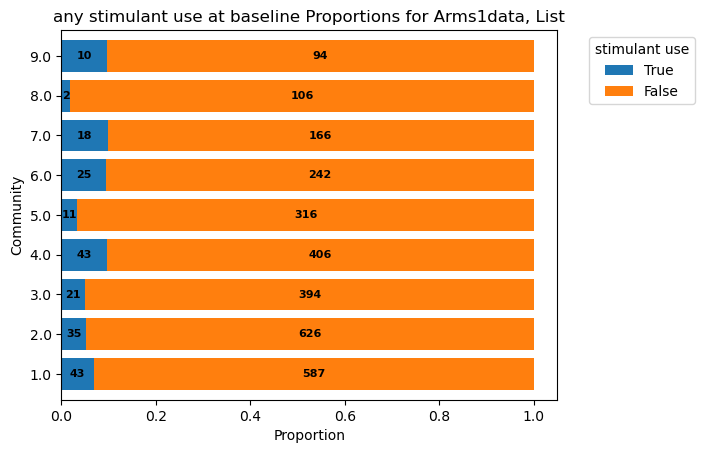

In [207]:
#plot the horizontal bar chart of the adhd label proportion data

#create the horizontal stacked bar chart
plt.figure(figsize=(25, 10))
ax = df_pivot.plot(kind='barh', stacked=True, width=0.8)

#customize the plot
plt.title('any stimulant use at baseline Proportions for Arms1data, List')
plt.xlabel('Proportion')
plt.ylabel('Community')

#remove the legend from its current position
plt.legend().remove()

#add a legend to the right of the plot
plt.legend(title='stimulant use', bbox_to_anchor=(1.05, 1), loc='upper left')

#adding in counts info
count_data = use_df_counts.pivot(index='community', columns='stim', values='count').fillna(0)

# Add count annotations on top of each segment in the bar
for i, community in enumerate(df_pivot.index):
    cumulative = 0
    for j, col in enumerate(df_pivot.columns):
        value = df_pivot.iloc[i, j]
        count = count_data.loc[community, col] if community in count_data.index and col in count_data.columns else 0
        middle = cumulative + value / 2
        ax.text(middle, i, f'{int(count)}', va='center', ha='center', fontweight='bold', fontsize=8)
        cumulative += value

#add percentage labels on the bars
#for c in ax.containers:
#    ax.bar_label(c, fmt='%.2f%%', label_type='center')

#adjust layout and display the plot
#plt.tight_layout()
plt.savefig('/home/faird/lundq163/projects/FRF_results_viz/medication_use_work/baseline_list_stim_use_proportions_arms1data_horzbar.png', dpi=300, bbox_inches='tight')
plt.show()

# trying something else

In [37]:
merged_use_df.head(5)

,subject_id,community,tlfb_alc_l,tlfb_tob_l,tlfb_mj_l,tlfb_mj_synth_l,tlfb_bitta_l,tlfb_inhalant_l,tlfb_rx_misuse_l,tlfb_list_yes_no_l
0,NDAR_INV003RTV85,7.0,NaN,NaN,1.0,0.0,0.0,1.0,1.0,0.0
1,NDAR_INV00BD7VDC,5.0,NaN,NaN,1.0,NaN,0.0,NaN,0.0,0.0
2,NDAR_INV00HEV6HB,1.0,NaN,NaN,NaN,1.0,0.0,1.0,NaN,1.0
3,NDAR_INV00LH735Y,8.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0
4,NDAR_INV00R4TXET,2.0,NaN,NaN,1.0,0.0,0.0,0.0,1.0,0.0


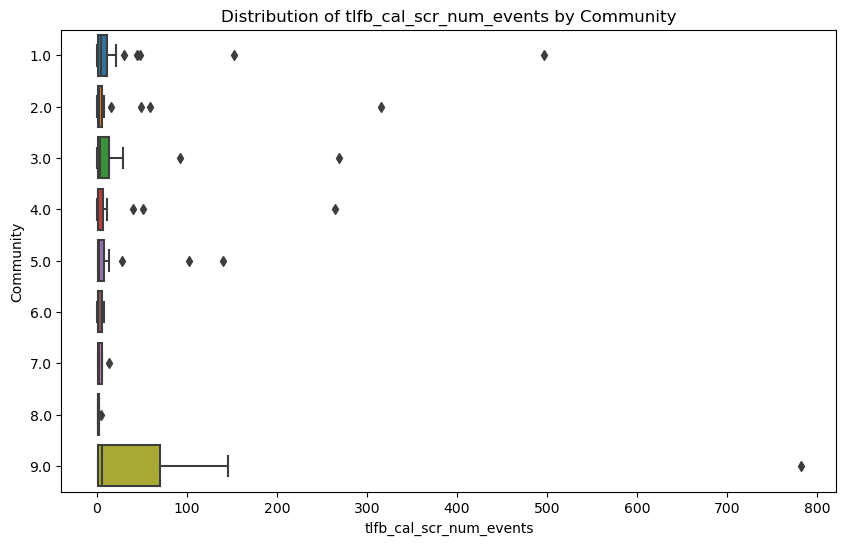

In [127]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='tlfb_cal_scr_num_events', y='community', data=merged_use_nonan_df, orient='h')
plt.title('Distribution of tlfb_cal_scr_num_events by Community')
plt.xlabel('tlfb_cal_scr_num_events')
plt.ylabel('Community')
plt.show()

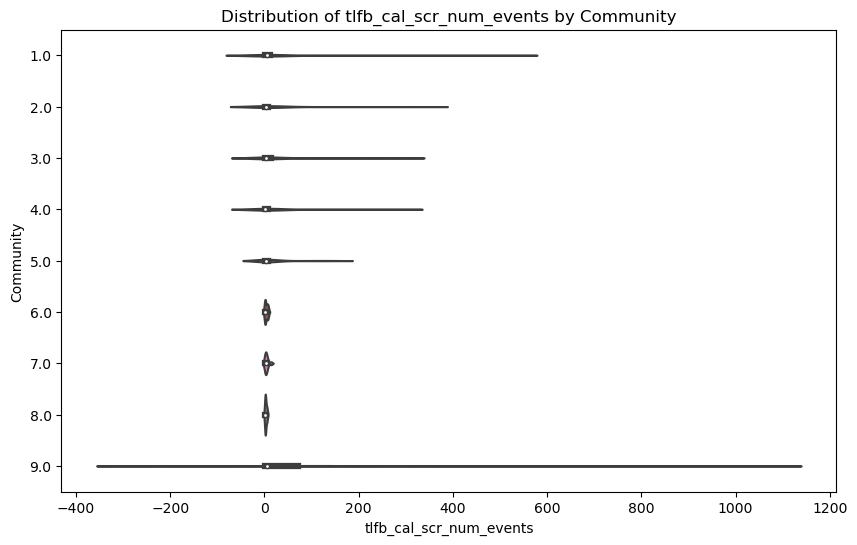

In [128]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='tlfb_cal_scr_num_events', y='community', data=merged_use_nonan_df, orient='h')
plt.title('Distribution of tlfb_cal_scr_num_events by Community')
plt.xlabel('tlfb_cal_scr_num_events')
plt.ylabel('Community')
plt.show()

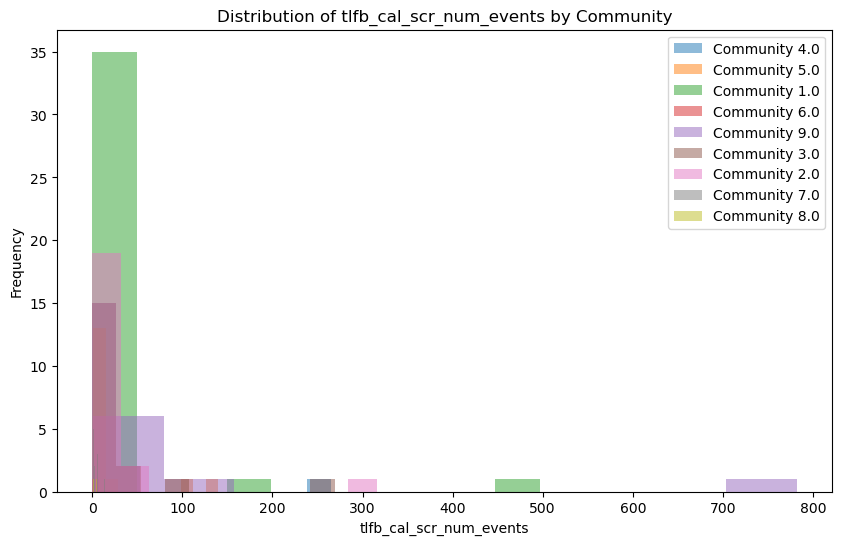

In [133]:
plt.figure(figsize=(10, 6))

for community in merged_use_nonan_df['community'].unique():
    community_data = merged_use_nonan_df[merged_use_nonan_df['community'] == community]['tlfb_cal_scr_num_events']
    plt.hist(community_data, bins=10, alpha=0.5, label=f'Community {community}')

plt.title('Distribution of tlfb_cal_scr_num_events by Community')
plt.xlabel('tlfb_cal_scr_num_events')
plt.ylabel('Frequency')
plt.legend()
plt.show()

ValueError: autodetected range of [nan, nan] is not finite

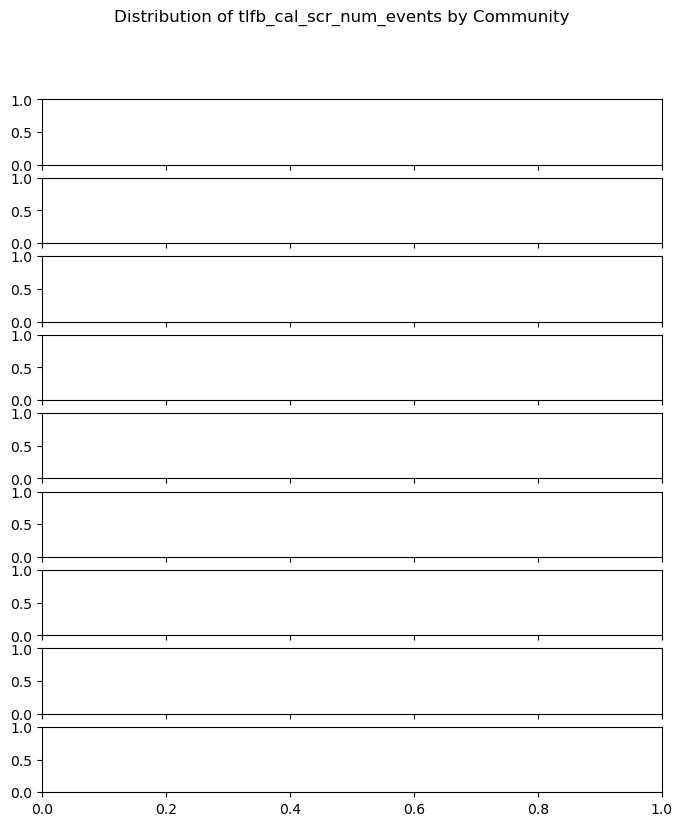

In [39]:
sorted_communities = sorted(merged_use_df['community'].unique(), reverse=True)
height_per_subplot = 1

# Create subplots
fig, axs = plt.subplots(len(sorted_communities), 1, figsize=(8, height_per_subplot*len(sorted_communities)), sharex=True, sharey=True)
fig.suptitle('Distribution of tlfb_cal_scr_num_events by Community')

# Find the overall max frequency for y-axis limit
max_freq = 0

# First pass to calculate histogram data and find max frequency
hist_data = []
for community in sorted_communities:
    community_data = merged_use_df[merged_use_df['community'] == community][heard_of_l_columns]
    counts, _ = np.histogram(community_data, bins=10)
    max_freq = max(max_freq, counts.max())
    hist_data.append((community_data, counts))

# Plot histogram for each community
for i, (community, (community_data, counts)) in enumerate(zip(sorted_communities, hist_data)):
    axs[i].hist(community_data, bins=10, edgecolor='black')
    axs[i].set_ylabel(f'{community}')
    axs[i].set_ylim(0, max_freq * 1.1)  # Set y-axis limit with 10% padding

# Remove x-labels and tick labels for all but the bottom subplot
for ax in axs[:-1]:
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Set x-label for the bottom subplot
axs[-1].set_xlabel('tlfb_cal_scr_num_events')

# Adjust layout and display
plt.tight_layout()
plt.show()

In [123]:
merged_use_nonan_df.groupby(['community', 'tlfb_cal_scr_num_events'],observed=False).agg(count=('subject_id', 'sum')).reset_index()
merged_use_nonan_df


,subject_id,community,tlfb_cal_scr_num_events
20,NDAR_INV04EUBGTM,4.0,6.0
26,NDAR_INV06A9DLE9,5.0,1.0
60,NDAR_INV0CV2Y4YR,1.0,0.0
85,NDAR_INV0HXXANFJ,6.0,2.0
142,NDAR_INV10J5M8LB,5.0,6.0
...,...,...,...
3562,NDAR_INVZCGL10MP,5.0,6.0
3563,NDAR_INVZD57Y0V7,3.0,12.0
3565,NDAR_INVZDYWHP34,5.0,1.0
3578,NDAR_INVZK8052MG,1.0,7.0


In [124]:
df_pivot = merged_use_nonan_df.pivot(index='community', columns='tlfb_cal_scr_num_events', values='subject_id')
df_pivot

ValueError: Index contains duplicate entries, cannot reshape